# Slit Wheel

This notebook demonstrates how to use the various slits in METIS. They are defined in a `SlitWheel` effect, which works in the same way as `FilterWheel`. The notebook uses imaging mode to show the slits directly. 

In [1]:
from matplotlib import pyplot as plt
from astropy import units as u


import scopesim as sim
sim.bug_report()

# Edit this path if you have a custom install directory, otherwise comment it out.
sim.link_irdb("../../../../")

Python:
3.10.18 (main, Jun  5 2025, 13:08:10) [GCC 11.2.0]

Installed Python packages:
           anisocado: 0.3.0
         astar-utils: 0.3.3
             astropy: 6.1.7
      beautifulsoup4: 4.13.4
            docutils: 0.19
               httpx: 0.28.1
                lxml: 5.4.0
          matplotlib: 3.10.5
      more-itertools: 10.7.0
               numpy: 1.26.4
           packaging: 25.0
               pooch: 1.8.2
              pyyaml: 6.0.2
               scipy: 1.15.3
            scopesim: 0.10.0
       scopesim_data: could not be loaded.
  scopesim_templates: could not be loaded.
         skycalc-ipy: 0.5.3
             synphot: 1.6.0
                tqdm: 4.67.1

Installed IRDB packages:
  Armazones: 2023-07-11
        ELT: 2025-06-30
      METIS: 2025-06-30

Operating System info:
   System: Linux
  Release: 6.12.13-200.fc41.aarch64
  Version: #1 SMP PREEMPT_DYNAMIC Sat Feb  8 20:30:50 UTC 2025
  Machine: aarch64


If you haven't got the instrument packages yet, uncomment the following cell.

In [ ]:
# sim.download_packages(["METIS", "ELT", "Armazones"])

In [2]:
cmd = sim.UserCommands(use_instrument="METIS", set_modes=["img_lm"])

In imaging mode, `"!OBS.slit"` is `false` by default, i.e. there is no slit in the path. However, slits can be used in imaging as well by setting `!OBS.slit` to one of the slits available in the METIS package.

In [3]:
cmd["!OBS.slit"] = "C-38_1"

In [4]:
metis = sim.OpticalTrain(cmd)

The following slits are now available and can be selected with `metis["slit_wheel"].change_slit()` as demonstrated below.

In [5]:
metis["slit_wheel"].get_table()

name,x_centre,y_centre,length,width
,mas,mas,mas,mas
str7,float64,float64,float64,float64
A-19_0,0.0,0.0,8000.0,19.0
B-28_6,0.0,0.0,8000.0,28.6
C-38_1,0.0,0.0,8000.0,38.1
D-57_1,0.0,0.0,8000.0,57.1
E-114_2,0.0,0.0,8000.0,114.2


In [7]:
implanes = dict()
for slit in metis["slit_wheel"].slits:
    metis["slit_wheel"].change_slit(slit)
    metis.observe()
    implanes[slit] = metis.image_planes[0].data

astar.scopesim.optics.optical_train - Observing empty field
astar.scopesim.effects.psfs - WARNING: PSF center off
astar.scopesim.optics.optical_train - Observing empty field
astar.scopesim.optics.optical_train - Observing empty field
astar.scopesim.optics.optical_train - Observing empty field
astar.scopesim.optics.optical_train - Observing empty field


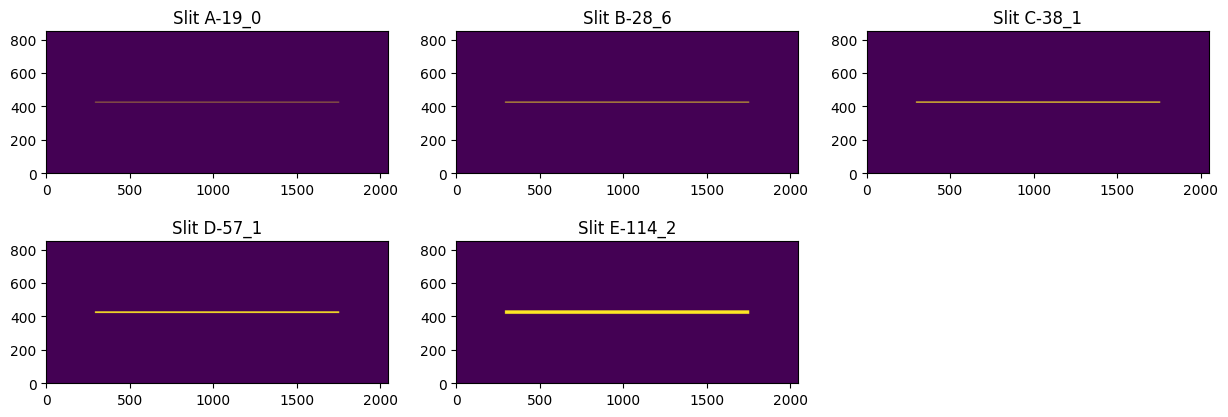

In [8]:
plt.figure(figsize=(15, 5))
for i, slit in enumerate(metis["slit_wheel"].slits):
    plt.subplot(2, 3, i+1)
    plt.imshow(implanes[slit][600:1450,], origin="lower")
    plt.title("Slit " + slit)

astar.scopesim.effects.psfs - WARNING: PSF center off


<Figure size 640x480 with 0 Axes>

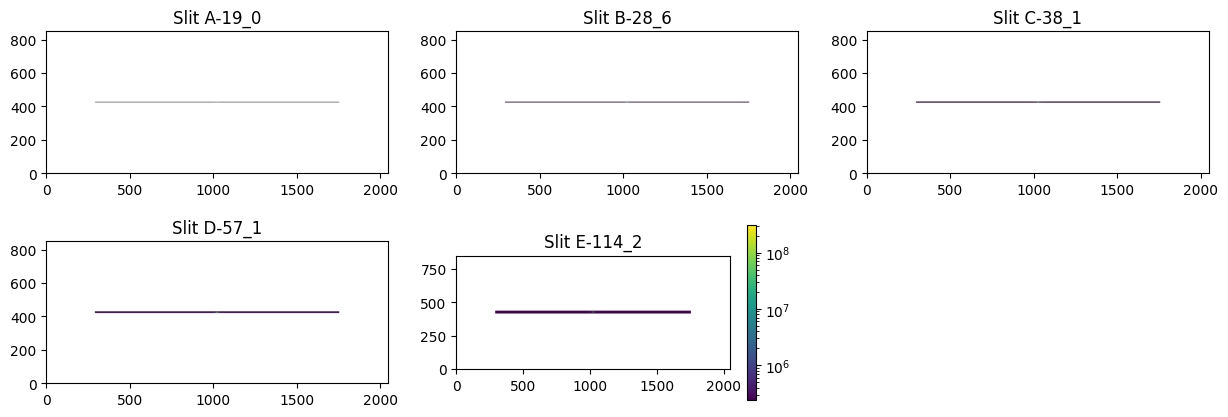

In [5]:
# observe a star

'''
#src = sim.source.source_templates.empty_sky()
src = sim.source.source_templates.star()
metis.observe(src)

plt.imshow(metis.image_planes[0].data, norm='log')
plt.show()
'''


#src = sim.source.source_templates.empty_sky()
src = sim.source.source_templates.star(flux=10*u.Jy)
plt.clf()
implanes = dict()

for slit in metis["slit_wheel"].slits:
    metis["slit_wheel"].change_slit(slit)
    metis.observe(src, update=True)
    implanes[slit] = metis.image_planes[0].data
    

plt.figure(figsize=(15, 5))
for i, slit in enumerate(metis["slit_wheel"].slits):
    plt.subplot(2, 3, i+1)
    plt.imshow(implanes[slit][600:1450,], norm='log', origin="lower")
    plt.title("Slit " + slit)
plt.colorbar()
plt.savefig('junk.pdf')


## Adding a slit to the slit wheel

The slit wheel holds a number of default slits (defined by the configuration for the instrument used). A custom slit can be added using the method `add_slit`. A "slit" is an object of class `ApertureMask` and the various methods for instantiating such an object can be used.

In [6]:
newslit = sim.effects.ApertureMask(
    name="Square",
    array_dict={
        "x": [-1, 1, 1, -1],
        "y": [-1, -1, 1, 1]
    }, 
    x_unit="arcsec",
    y_unit="arcsec",
)
metis["slit_wheel"].add_slit(newslit)
metis["slit_wheel"].get_table()

name,x_centre,y_centre,length,width
,mas,mas,mas,mas
str7,float64,float64,float64,float64
A-19_0,0.0,0.0,8000.0,19.0
B-28_6,0.0,0.0,8000.0,28.6
C-38_1,0.0,0.0,8000.0,38.1
D-57_1,0.0,0.0,8000.0,57.1
E-114_2,0.0,0.0,8000.0,114.2
Square,0.0,0.0,1999.9999999999998,1999.9999999999998


astar.scopesim.optics.optical_train - Observing empty field
astar.scopesim.effects.psfs - WARNING: PSF center off


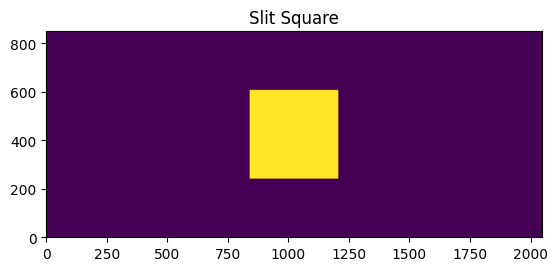

In [7]:
metis["slit_wheel"].change_slit("Square")
metis.observe()
implane = metis.image_planes[0].data
plt.imshow(implane[600:1450,], origin="lower")
plt.title("Slit " + metis["slit_wheel"].current_slit.meta["name"]);